In [47]:
%matplotlib inline

In [48]:
# pandas
import pandas as pd
from pandas import Series,DataFrame
# numpy 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

In [49]:
# dataFrame
rossmann_df = pd.read_csv('./input/rossman/train.csv')
store_df = pd.read_csv('./input/rossman/store.csv')
test_df = pd.read_csv('./input/rossman/test.csv')
# Preview
rossmann_df.head()

D:\soft\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [50]:
rossmann_df[rossmann_df['Store']==1115]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1114,1115,5,2015-07-31,8680,538,1,1,0,1
2229,1115,4,2015-07-30,8405,502,1,1,0,1
3344,1115,3,2015-07-29,7661,473,1,1,0,1
4459,1115,2,2015-07-28,8093,500,1,1,0,1
5574,1115,1,2015-07-27,10712,608,1,1,0,1
6689,1115,7,2015-07-26,0,0,0,0,0,0
7804,1115,6,2015-07-25,6897,478,1,0,0,0
8919,1115,5,2015-07-24,5816,417,1,0,0,0
10034,1115,4,2015-07-23,6150,435,1,0,0,0
11149,1115,3,2015-07-22,5342,382,1,0,0,0


In [51]:
test_df[test_df['Store']==1115]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
855,856,1115,4,2015-09-17,1.0,1,0,0
1711,1712,1115,3,2015-09-16,1.0,1,0,0
2567,2568,1115,2,2015-09-15,1.0,1,0,0
3423,3424,1115,1,2015-09-14,1.0,1,0,0
4279,4280,1115,7,2015-09-13,0.0,0,0,0
5135,5136,1115,6,2015-09-12,1.0,0,0,0
5991,5992,1115,5,2015-09-11,1.0,0,0,0
6847,6848,1115,4,2015-09-10,1.0,0,0,0
7703,7704,1115,3,2015-09-09,1.0,0,0,0
8559,8560,1115,2,2015-09-08,1.0,0,0,0


In [52]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [53]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [54]:
rossmann_df.info()
print('-'*20)
store_df.info()
print('-'*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int6

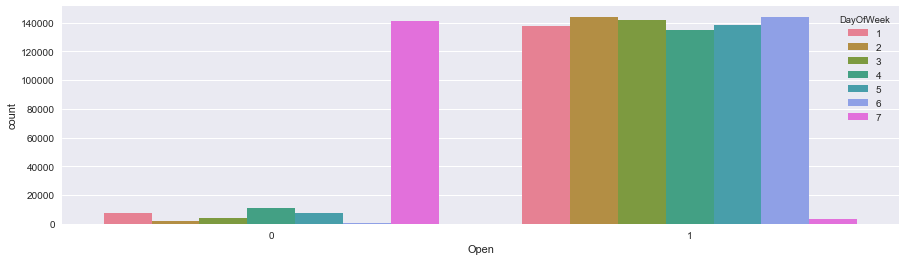

In [55]:
fig,(axis1)= plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek',data=rossmann_df,palette='husl',ax=axis1)

In [56]:
test_df["DayOfWeek"] != 7

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
41058    True
41059    True
41060    True
41061    True
41062    True
41063    True
41064    True
41065    True
41066    True
41067    True
41068    True
41069    True
41070    True
41071    True
41072    True
41073    True
41074    True
41075    True
41076    True
41077    True
41078    True
41079    True
41080    True
41081    True
41082    True
41083    True
41084    True
41085    True
41086    True
41087    True
Name: DayOfWeek, Length: 41088, dtype: bool

In [57]:
test_df.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [58]:
test_df["Open"][test_df["Open"]!=test_df["Open"]]

479     NaN
1335    NaN
2191    NaN
3047    NaN
4759    NaN
5615    NaN
6471    NaN
7327    NaN
8183    NaN
9039    NaN
10751   NaN
Name: Open, dtype: float64

In [59]:
test_df["Open"][test_df["Open"]!=test_df["Open"]]=(test_df['DayOfWeek'] != 7).astype(int)

D:\soft\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
test_df["Open"][test_df["Open"]!=test_df["Open"]]

Series([], Name: Open, dtype: float64)

In [61]:
test_df["Open"][479]

1.0

In [62]:
# Date 
# Create new date column
rossmann_df['Year'] = rossmann_df['Date'].apply(lambda x : int(str(x)[:4]))
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x : int(str(x)[5:7]))
test_df['Year'] = test_df['Date'].apply(lambda x : int(str(x)[:4]))
test_df['Month'] = test_df['Date'].apply(lambda x : int(str(x)[5:7]))

# 简化Date 方便可视化
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda x : str(x)[:7])
test_df['Date'] = test_df['Date'].apply(lambda x : str(x)[:7])

average_sales = rossmann_df.groupby('Date')['Sales'].mean()
pct_changle_sales = rossmann_df.groupby('Date')['Sales'].sum().pct_change()
print(average_sales)
print('='*20)
print(pct_changle_sales)

Date
2013-01    5211.555578
2013-02    5494.371397
2013-03    5820.349168
2013-04    5483.749836
2013-05    5364.127383
2013-06    5402.162960
2013-07    6042.062260
2013-08    5729.574049
2013-09    5322.988430
2013-10    5429.258788
2013-11    5864.601614
2013-12    6703.618140
2014-01    5431.875799
2014-02    5731.091512
2014-03    5584.257312
2014-04    5815.993333
2014-05    5632.670534
2014-06    5681.526188
2014-07    5999.403381
2014-08    5649.421252
2014-09    5865.104029
2014-10    5665.564878
2014-11    6179.249661
2014-12    6973.282456
2015-01    5752.747866
2015-02    5710.296541
2015-03    5949.130132
2015-04    5916.857578
2015-05    5472.122002
2015-06    6199.203976
2015-07    6142.705511
Name: Sales, dtype: float64
Date
2013-01         NaN
2013-02   -0.047731
2013-03    0.172829
2013-04   -0.088224
2013-05    0.010792
2013-06   -0.025396
2013-07    0.155734
2013-08   -0.051719
2013-09   -0.100932
2013-10    0.053963
2013-11    0.045340
2013-12    0.181167
2014-01  

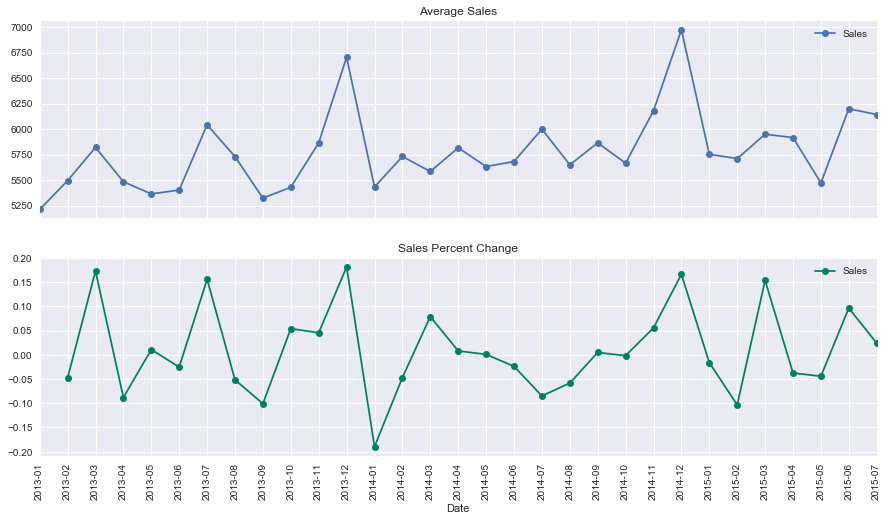

In [63]:
fig,(axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title='Average Sales')
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(),rotation=90)
ax2 = pct_changle_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap='summer',title='Sales Percent Change')

In [64]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07,5263,555,1,1,0,1,2015,7
1,2,5,2015-07,6064,625,1,1,0,1,2015,7
2,3,5,2015-07,8314,821,1,1,0,1,2015,7
3,4,5,2015-07,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07,4822,559,1,1,0,1,2015,7


In [65]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,1,4,2015-09,1.0,1,0,0,2015,9
1,2,3,4,2015-09,1.0,1,0,0,2015,9
2,3,7,4,2015-09,1.0,1,0,0,2015,9
3,4,8,4,2015-09,1.0,1,0,0,2015,9
4,5,9,4,2015-09,1.0,1,0,0,2015,9


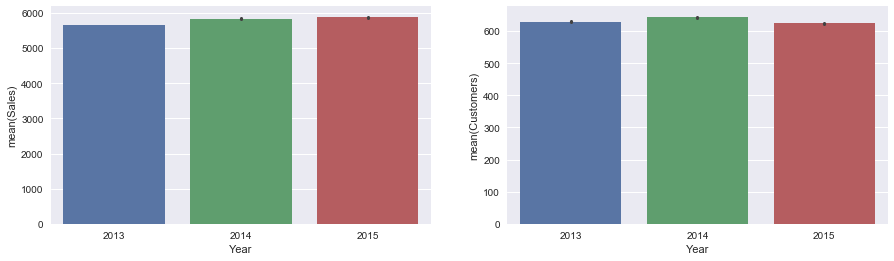

In [66]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(ax=axis1,data=rossmann_df,x='Year',y='Sales')
sns.barplot(ax=axis2,data=rossmann_df,x='Year',y='Customers')

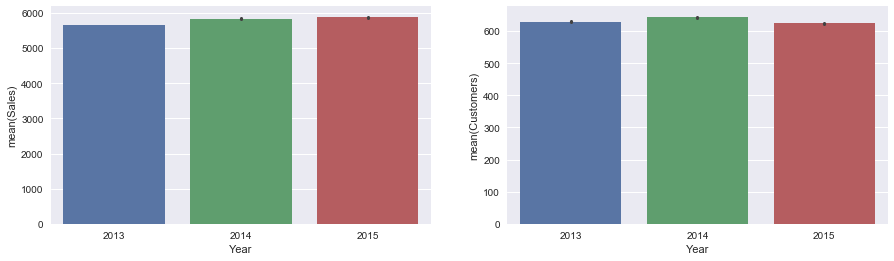

In [67]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Year', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='Year', y='Customers', data=rossmann_df, ax=axis2)

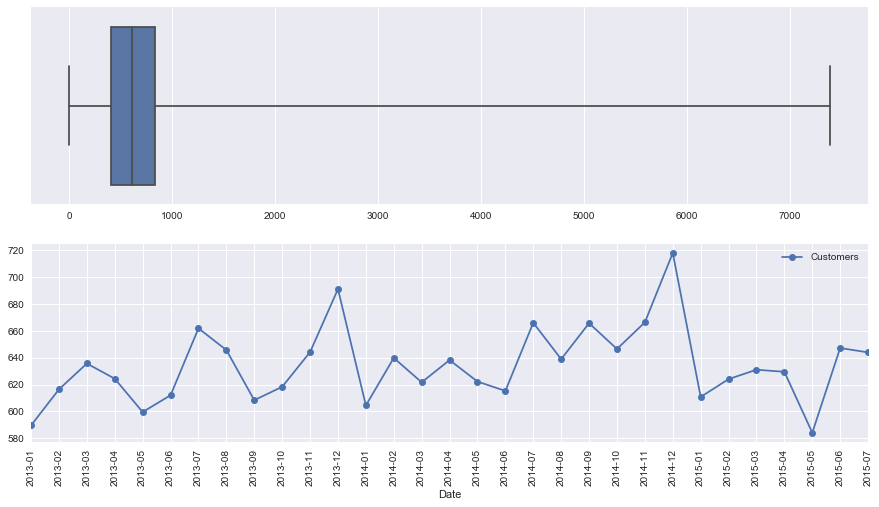

In [ ]:
fig ,(axis1,axis2) = plt.subplots(2,1,figsize=(15,8))
sns.boxplot([rossmann_df['Customers']],whis=np.inf,ax=axis1)
average_customers = rossmann_df.groupby('Date')['Customers'].mean()
ax = average_customers.plot(legend=True,marker='o',ax=axis2)
ax.set_xticks(range(len(average_customers)))
xlabels = ax.set_xticklabels(average_customers.index.tolist(),rotation=90)

In [ ]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek',y='Sales',data=rossmann_df,order=[1,2,3,4,5,6,7],ax=axis1)
sns.barplot(x='DayOfWeek',y='Customers',data=rossmann_df,order=[1,2,3,4,5,6,7],ax=axis2)

In [ ]:
# Promo
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='Promo',y='Sales',data=rossmann_df,ax=axis1)
sns.barplot(x='Promo',y='Customers',data=rossmann_df,ax=axis2)

In [ ]:
# StateHoliday

# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
rossmann_df["StateHoliday"].loc[rossmann_df["StateHoliday"] == 0] = "0"
# test_df["StateHoliday"].loc[test_df["StateHoliday"] == 0] = "0"

# Plot
sns.countplot(x='StateHoliday', data=rossmann_df)

# Before
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=rossmann_df, ax=axis1)

mask = (rossmann_df["StateHoliday"] != "0") & (rossmann_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=rossmann_df[mask], ax=axis2)# .... continue with StateHoliday

In [ ]:
# After
rossmann_df["StateHoliday"] = rossmann_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test_df["StateHoliday"]     = test_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=rossmann_df, ax=axis2)

In [ ]:
sns.countplot(x='SchoolHoliday', data=rossmann_df)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data=rossmann_df, ax=axis2)

In [ ]:
# Sales

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot([rossmann_df["Customers"]], whis=np.inf, ax=axis1)

# Plot sales values 
# Notice that values with 0 is mostly because the store was closed
rossmann_df["Sales"].plot(kind='hist',bins=70,xlim=(0,15000),ax=axis2)

In [ ]:
# Using store_df

# Merge store_df with average store sales & customers
average_sales_customers = rossmann_df.groupby('Store')[["Sales", "Customers"]].mean()
sales_customers_df = DataFrame({'Store':average_sales_customers.index,
                      'Sales':average_sales_customers["Sales"], 'Customers': average_sales_customers["Customers"]}, 
                      columns=['Store', 'Sales', 'Customers'])
store_df = pd.merge(sales_customers_df, store_df, on='Store')

store_df.head()

In [ ]:
# StoreType 

# Plot StoreType, & StoreType Vs average sales and customers

sns.countplot(x='StoreType', data=store_df, order=['a','b','c', 'd'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StoreType', y='Sales', data=store_df, order=['a','b','c', 'd'],ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=store_df, order=['a','b','c', 'd'], ax=axis2)

In [ ]:
# Assortment 

# Plot Assortment, & Assortment Vs average sales and customers

sns.countplot(x='Assortment', data=store_df, order=['a','b','c'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=store_df, order=['a','b','c'], ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=store_df, order=['a','b','c'], ax=axis2)

In [ ]:
# Promo2

# Plot Promo2, & Promo2 Vs average sales and customers

sns.countplot(x='Promo2', data=store_df)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=store_df, ax=axis1)
sns.barplot(x='Promo2', y='Customers', data=store_df, ax=axis2)

In [ ]:
store_df.head()

In [ ]:
# CompetitionDistance

# fill NaN values
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median())

# Plot CompetitionDistance Vs Sales
store_df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
store_df.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

In [ ]:
# CompetitionDistance

# fill NaN values
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median())

# Plot CompetitionDistance Vs Sales
store_df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
store_df.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

In [ ]:
# What happened to the average sales of a store over time when competition started?
# Example: the average sales for store_id = 6 has dramatically decreased since the competition started

store_id = 6
store_data = rossmann_df[rossmann_df["Store"] == store_id]

average_store_sales = store_data.groupby('Date')["Sales"].mean()

# Get year, and month when Competition started
y = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
m = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

# Plot 
ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

# Since all data of store sales given in rossmann_df starts with year=2013 till 2015,
# So, we need to check if year>=2013 and y & m aren't NaN values.
if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')

In [ ]:
# Risk Analysis
# Analyze the risk of a store; Risk(std) Vs Expected(mean)

# .... countiue using store_data
store_average = store_data["Sales"].mean()
store_std     = store_data["Sales"].std()

# Plot
plt.scatter(store_average, store_std,alpha = 0.5,s =np.pi*20)

# Get min & max mean and std of store sales
# Remember that store_df["Sales"] has the average sales for a store
std_sales = rossmann_df.groupby('Store')["Sales"].std()

min_average = store_df["Sales"].min()
max_average = store_df["Sales"].max()
min_std     = std_sales.min()
max_std     = std_sales.max()

# Set the x and y limits of the plot
plt.ylim([min_std, max_std])
plt.xlim([min_average, max_average])

# Set the plot axis titles
plt.xlabel('Expected Sales')
plt.ylabel('Risk')

# Set label
label, x, y = "Store {}".format(store_id), store_average, store_std
plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
# Correlation
# Visualize the Correlation between stores

store_piv       = pd.pivot_table(rossmann_df,values='Sales', index='Date', columns=['Store'],aggfunc='sum')
store_pct_chage = store_piv.pct_change().dropna()
store_piv.head()

In [ ]:
# .... continue Correlation

# Plot correlation between range of stores
start_store = 1
end_store   = 5

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# using summation of sales values for each store 
sns.heatmap(store_piv[list(range(start_store, end_store+1))].corr(),annot=True,linewidths=2)

In [ ]:
# using percent change for each store
# sns.heatmap(store_pct_chage[list(range(start_store, end_store+1))].corr(),annot=True,linewidths=2)# Notice that test_df has only year=2015, and months 8 & 9

# drop Year and Month
rossmann_df.drop(["Year", "Month"], axis=1, inplace=True)
test_df.drop(["Year", "Month"], axis=1, inplace=True)

# Create dummy varibales for DayOfWeek
day_dummies_rossmann  = pd.get_dummies(rossmann_df['DayOfWeek'], prefix='Day')
day_dummies_rossmann.drop(['Day_7'], axis=1, inplace=True)

day_dummies_test  = pd.get_dummies(test_df['DayOfWeek'],prefix='Day')
day_dummies_test.drop(['Day_7'], axis=1, inplace=True)

rossmann_df = rossmann_df.join(day_dummies_rossmann)
test_df     = test_df.join(day_dummies_test)

rossmann_df.drop(['DayOfWeek'], axis=1,inplace=True)
test_df.drop(['DayOfWeek'], axis=1,inplace=True)

In [ ]:
# remove all rows(store,date) that were closed
rossmann_df = rossmann_df[rossmann_df["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
rossmann_df.drop(["Open","Customers", "Date"], axis=1, inplace=True)

In [ ]:
# save ids of closed stores, because we will assign their sales value to 0 later(see below)
closed_store_ids = test_df["Id"][test_df["Open"] == 0].values

# remove all rows(store,date) that were closed
test_df = test_df[test_df["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
test_df.drop(['Open', 'Date'], axis=1,inplace=True)

In [ ]:
# Loop through each store, 
# train the model using the data of current store, and predict it's sales values.

rossmann_dic = dict(list(rossmann_df.groupby('Store')))
print('rossmann_dict:',rossmann_dic)
test_dic     = dict(list(test_df.groupby('Store')))
print('test_dict:',test_dic)
submission   = Series()
scores       = []

for i in test_dic:
    
    # current store
    store = rossmann_dic[i]
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store"],axis=1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(X_train, Y_train)
    Y_pred = lreg.predict(X_test)
    scores.append(lreg.score(X_train, Y_train))

    # Xgboost
    # params = {"objective": "reg:linear",  "max_depth": 10}
    # T_train_xgb = xgb.DMatrix(X_train, Y_train)
    # X_test_xgb  = xgb.DMatrix(X_test)
    # gbm = xgb.train(params, T_train_xgb, 100)
    # Y_pred = gbm.predict(X_test_xgb)
    
    # append predicted values of current store to submission
    submission = submission.append(Series(Y_pred, index=store_ids))

# append rows(store,date) that were closed, and assign their sales value to 0
submission = submission.append(Series(0, index=closed_store_ids))

# save to csv file
submission = pd.DataFrame({ "Id": submission.index, "Sales": submission.values})
submission.to_csv('rossmann.csv', index=False)